In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pykrige.kriging_tools as kt


In [42]:
df_stations = pd.read_csv('Air_quality_data/Stazioni_qualit__dell_aria_20240430.csv')
df_air_quality1 = pd.read_csv('Air_quality_data/Dati_sensori_aria_2010-2017_20240430.csv', low_memory=False)
df_air_quality2 = pd.read_csv('Air_quality_data/Dati_sensori_aria_dal_2018_20240430.csv', low_memory=False)

In [43]:
# Add the two dataframes together by row
df_air_quality = pd.concat([df_air_quality1, df_air_quality2], axis=0)

In [44]:
milan_municipalities = [
    'Abbiategrasso', 'Albairate', 'Arconate', 'Arese', 'Arluno', 'Assago',
    'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo',
    'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', 'Cassano d\'Adda', 'Cassina de\' Pecchi', 'Cassinetta di Lugagnano', 'Castano Primo', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cinisello Balsamo', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cormano', 'Cornaredo', 'Corsico', 'Cuggiono', 'Cusago', 'Cusano Milanino',
    'Dairago', 'Dresano',
    'Gaggiano', 'Garbagnate Milanese', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti',
    'Inveruno', 'Inzago',
    'Lacchiarella', 'Lainate', 'Legnano', 'Liscate', 'Locate di Triulzi',
    'Magenta', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melegnano', 'Melzo', 'Mesero', 'Milano', 'Morimondo', 'Motta Visconti',
    'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio',
    'Opera', 'Ossona', 'Ozzero',
    'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Pero', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuele', 'Pioltello', 'Pogliano Milanese', 'Pozzo D\'Adda', 'Pozzuolo Martesana', 'Pregnana Milanese',
    'Rescaldina', 'Rho', 'Robecchetto con Induno', 'Robecco sul Naviglio', 'Rodano', 'Rosate', 'Rozzano',
    'San Colombano al Lambro', 'San Donato Milanese', 'San Giorgio su Legnano', 'San Giuliano Milanese', 'San Vittore Olona', 'San Zenone al Lambro', 'Santo Stefano Ticino', 'Sedriano', 'Segrate', 'Senago', 'Sesto San Giovanni', 'Settala', 'Settimo Milanese', 'Solaro',
    'Trezzano Rosa', 'Trezzano sul Naviglio', 'Trezzo sull\'Adda', 'Tribiano', 'Truccazzano', 'Turbigo',
    'Vanzaghello', 'Vanzago', 'Vaprio d\'Adda', 'Vermezzo con Zelo', 'Vernate', 'Vignate', 'Villa Cortese', 'Vimodrone', 'Vittuone', 'Vizzolo Predabissi',
    'Zibido San Giacomo'
]

In [45]:
## Print the number of municipalities in Milan
print(len(milan_municipalities))

133


In [46]:
## Make a list of municipalities in Milan that are not in the dataset
not_in_dataset = [municipality for municipality in milan_municipalities if municipality not in df_stations['Comune'].unique()]
print(not_in_dataset)

['Albairate', 'Arluno', 'Assago', 'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo', 'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', "Cassina de' Pecchi", 'Cassinetta di Lugagnano', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cornaredo', 'Cusago', 'Cusano Milanino', 'Dairago', 'Dresano', 'Gaggiano', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti', 'Inveruno', 'Liscate', 'Locate di Triulzi', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melzo', 'Mesero', 'Morimondo', 'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio', 'Opera', 'Ossona', 'Ozzero', 'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuel

In [47]:
## Drop rows with municipalities not in the list of milan_municipalities
df_milano_stations = df_stations[df_stations['Comune'].isin(milan_municipalities)]
print(df_milano_stations['Comune'].unique())

['Inzago' 'Pero' 'Sesto San Giovanni' 'Lacchiarella' 'Cormano' 'Corsico'
 'Milano' "Cassano d'Adda" 'Cuggiono' "Trezzo sull'Adda"
 'Cinisello Balsamo' 'Legnano' 'Motta Visconti' 'Magenta' 'Turbigo'
 'Robecchetto con Induno' 'Arconate' 'Settimo Milanese' 'Pioltello' 'Rho'
 'San Giuliano Milanese' 'Arese' 'Abbiategrasso' 'Melegnano' 'Lainate'
 'Garbagnate Milanese' 'Tribiano' 'Castano Primo' 'Truccazzano']


In [48]:
## Print the number of municipalities in province of Milan that have air quality data
print(len(df_milano_stations['Comune'].unique()))

29


In [49]:
## Count the number of rows for each unique value in 'NomeTipoSensore' column
print(df_milano_stations['NomeTipoSensore'].value_counts())

Ossidi di Azoto               38
Biossido di Azoto             38
Biossido di Zolfo             32
Monossido di Carbonio         26
Ozono                         17
Particolato Totale Sospeso    14
PM10 (SM2005)                 13
Benzene                        7
Particelle sospese PM2.5       6
BlackCarbon                    5
Ammoniaca                      4
Arsenico                       3
Piombo                         3
Nikel                          3
Benzo(a)pirene                 3
Cadmio                         3
Name: NomeTipoSensore, dtype: int64


In [50]:
## Get  the unique values of 'UnitaMisura' column
print(df_milano_stations['UnitaMisura'].unique())


['µg/m³' 'ng/m³' 'mg/m³']


In [51]:
## Get the list IdSensore for each unique value in 'NomeTipoSensore' column
idSensor_grouped_by_type = df_milano_stations.groupby('NomeTipoSensore')['IdSensore'].unique()
print(idSensor_grouped_by_type)

NomeTipoSensore
Ammoniaca                                          [20020, 20484, 10269, 20525]
Arsenico                                                  [12608, 12638, 12625]
Benzene                            [17127, 6057, 6037, 9998, 6062, 6059, 17126]
Benzo(a)pirene                                            [12641, 12611, 12629]
Biossido di Azoto             [5507, 5513, 5531, 5550, 5520, 5549, 5519, 554...
Biossido di Zolfo             [5620, 5621, 5618, 5617, 5627, 5643, 5642, 563...
BlackCarbon                                 [20455, 29001, 20004, 20465, 20005]
Cadmio                                                    [12626, 12609, 12639]
Monossido di Carbonio         [5814, 5820, 5819, 5835, 5831, 5813, 5834, 581...
Nikel                                                     [12624, 12637, 12607]
Ossidi di Azoto               [6342, 6318, 6338, 6350, 6360, 6346, 6276, 629...
Ozono                         [5712, 5714, 5710, 5713, 5724, 5725, 10350, 57...
PM10 (SM2005)           

In [52]:
## Print the number of rows in the air quality dataframe for each unique value in 'IdSensore' column
print(df_air_quality['idSensore'].value_counts())

6665     122511
5721     122428
5548     122419
6419     122390
5749     122381
          ...  
17083       248
6922        105
5769        105
6943          3
6942          3
Name: idSensore, Length: 924, dtype: int64


In [53]:
## Remove column 'idOperatore' from the air quality dataframe
df_air_quality = df_air_quality.drop('idOperatore', axis=1)
df_air_quality.head()

,idSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [54]:
## Rename the column 'idSensore' to 'IdSensore' in the air quality dataframe
df_air_quality = df_air_quality.rename(columns={'idSensore': 'IdSensore'})
df_air_quality.head()

,IdSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [55]:
## Add 'UnitaMisura' column to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'UnitaMisura']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³


In [56]:
## Append the column 'NomeTipoSensore' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'NomeTipoSensore']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [57]:
## Get the unique values of 'UnitaMisura'  for each unique value of 'NomeTipoSensore' in the air quality dataframe
unita_misura_grouped_by_type = df_air_quality.groupby('NomeTipoSensore')['UnitaMisura'].unique()
print(unita_misura_grouped_by_type)

NomeTipoSensore
Ammoniaca                     [µg/m³]
Arsenico                      [ng/m³]
Benzene                       [µg/m³]
Benzo(a)pirene                [ng/m³]
Biossido di Azoto             [µg/m³]
Biossido di Zolfo             [µg/m³]
BlackCarbon                   [µg/m³]
Cadmio                        [ng/m³]
Monossido di Carbonio         [mg/m³]
Nikel                         [ng/m³]
Ossidi di Azoto               [µg/m³]
Ozono                         [µg/m³]
PM10 (SM2005)                 [µg/m³]
Particelle sospese PM2.5      [µg/m³]
Particolato Totale Sospeso    [µg/m³]
Piombo                        [ng/m³]
Name: UnitaMisura, dtype: object


In [61]:
## Remove rows where 'NomeTipoSensore' has the value 'Cadmio', 'Benzo(a)pirene', 'Nikel', 'Piombo', 'Arsenico', 'Ammoniaca', 'BlackCarbon', 'Particelle sospese PM2.5', 'Benzene'
df_air_quality = df_air_quality[~df_air_quality['NomeTipoSensore'].isin(['Cadmio', 'Benzo(a)pirene', 'Nikel', 'Piombo', 'Arsenico', 'Ammoniaca', 'BlackCarbon', 'Particelle sospese PM2.5', 'Benzene'])]
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [25]:
## Count how many rows for each unique values of column 'Valore' that are less than 0 in the air quality dataframe
print(df_air_quality['Valore'][df_air_quality['Valore'] < 0].value_counts())

-9999.0    1971319
-0.2             2
-0.4             1
-0.1             1
Name: Valore, dtype: int64


In [63]:
## Remove rows with values less than 0 in the column 'Valore' in the air quality dataframe
df_air_quality = df_air_quality[df_air_quality['Valore'] >= 0]
df_air_quality.head()

,IdSensore,Data,Valore,Stato,UnitaMisura,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,µg/m³,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,µg/m³,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,µg/m³,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,µg/m³,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,µg/m³,Biossido di Azoto


In [64]:
## Convert the column 'Date' to datetime
df_air_quality['Data'] = pd.to_datetime(df_air_quality['Data'])
df_air_quality.head()

KeyboardInterrupt: 

In [22]:
## Append the column 'Comune' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'Comune']], on='IdSensore')
df_air_quality.head()

,IdSensore,Valore,Stato,UnitaMisura,NomeTipoSensore,Day,Month,Year,Time,Comune
0,5504,70.7,VA,µg/m³,Biossido di Azoto,1,1,2010,01:00:00,Milano
1,5504,73.0,VA,µg/m³,Biossido di Azoto,1,1,2010,02:00:00,Milano
2,5504,69.0,VA,µg/m³,Biossido di Azoto,1,1,2010,03:00:00,Milano
3,5504,66.0,VA,µg/m³,Biossido di Azoto,1,1,2010,04:00:00,Milano
4,5504,68.8,VA,µg/m³,Biossido di Azoto,1,1,2010,05:00:00,Milano


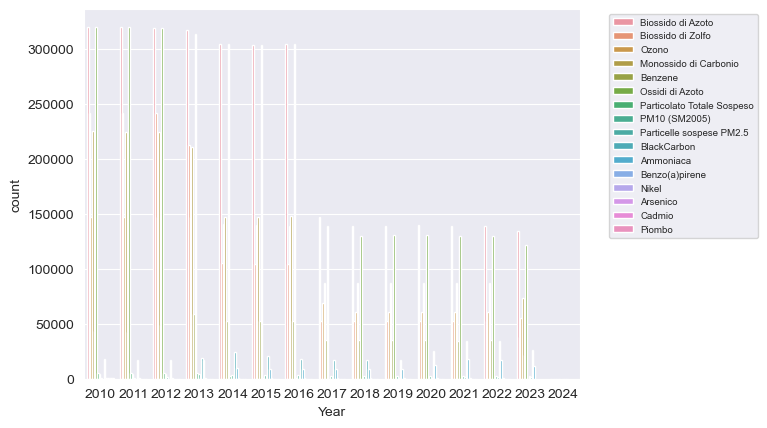

In [23]:
## Plot number of rows for each unique value in 'NomeTipoSensore' column per year in the air quality dataframe
sns.countplot(x='Year', hue='NomeTipoSensore', data=df_air_quality)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [24]:
# Group by 'Year' and 'idSensore', and count the number of rows
result = df_air_quality.groupby(['Year', 'IdSensore']).size()

# Now print the result
print(result)

Year  IdSensore
2010  5504         8757
      5505         8756
      5506         8664
      5507         8756
      5508         8654
                   ... 
2024  20429           1
      20455           1
      20465           1
      20484           1
      20529           1
Length: 2013, dtype: int64


In [26]:
## Count how many NaN values in the column 'Valore' in the air quality dataframe
print(df_air_quality['Valore'].isnull().sum())

0


In [28]:
## Add a column 'YearlyAverage' to the air quality dataframe that contains the average value of 'Valore' for each year for each unique IdSensore
df_air_quality['YearlyAverage'] = df_air_quality.groupby(['Year', 'IdSensore'])['Valore'].transform('mean')
df_air_quality.head()

,IdSensore,Valore,Stato,UnitaMisura,NomeTipoSensore,Day,Month,Year,Time,Comune,YearlyAverage
0,5504,70.7,VA,µg/m³,Biossido di Azoto,1,1,2010,01:00:00,Milano,73.336213
1,5504,73.0,VA,µg/m³,Biossido di Azoto,1,1,2010,02:00:00,Milano,73.336213
2,5504,69.0,VA,µg/m³,Biossido di Azoto,1,1,2010,03:00:00,Milano,73.336213
3,5504,66.0,VA,µg/m³,Biossido di Azoto,1,1,2010,04:00:00,Milano,73.336213
4,5504,68.8,VA,µg/m³,Biossido di Azoto,1,1,2010,05:00:00,Milano,73.336213


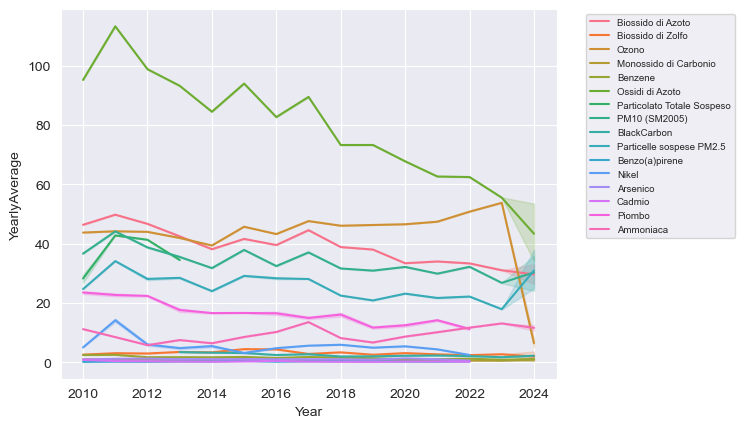

In [30]:
## Plot the average value of 'Valore' for each year for each unique IdSensore
sns.lineplot(x='Year', y='YearlyAverage', hue='NomeTipoSensore', data=df_air_quality)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
## Get the maximum value of 'Valore' for each unique NomeTipoSensore for each year in the air quality dataframe
max_values = df_air_quality.groupby(['Year', 'NomeTipoSensore'])['Valore'].max()
print(max_values)

Year  NomeTipoSensore         
2010  Ammoniaca                    44.300
      Arsenico                      6.260
      Benzene                      11.500
      Benzo(a)pirene                2.452
      Biossido di Azoto           293.700
                                   ...   
2024  Monossido di Carbonio         1.700
      Ossidi di Azoto              88.700
      Ozono                         9.700
      PM10 (SM2005)                46.700
      Particelle sospese PM2.5     38.000
Name: Valore, Length: 216, dtype: float64


In [32]:
## Create a dataframe with each unique value of 'NomeTipoSensore' as index and the YearlyAverage for each year as columns
df_yearly_average = df_air_quality.pivot_table(index='NomeTipoSensore', columns='Year', values='YearlyAverage')
df_yearly_average.head()

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
NomeTipoSensore,,,,,,,,,,,,,,,
Ammoniaca,11.225123,8.546661,5.820884,7.543367,6.467013,8.578975,10.266425,13.592210,8.211536,6.719089,8.714235,10.181124,11.727822,13.151383,11.65000
Arsenico,1.006657,1.222516,1.295061,1.095627,1.085033,1.109277,1.073864,1.086213,1.050000,0.955254,1.373918,1.080469,0.608555,NaN,NaN
Benzene,2.510333,2.561574,1.754316,1.763138,1.728247,1.846879,1.516307,1.832991,1.624937,1.411862,1.034096,1.097120,1.259523,0.902152,1.12500
Benzo(a)pirene,0.191332,0.264938,0.229927,0.368191,0.366706,0.565683,0.255068,0.416600,0.446371,0.443009,0.311180,0.278079,0.391826,NaN,NaN
Biossido di Azoto,46.398507,49.804847,46.721373,42.506211,38.168204,41.636087,39.569663,44.581334,38.891081,38.049908,33.439636,34.032689,33.384276,31.074580,29.68125


In [33]:
## Df with YearlyAverage, max and min values of 'Valore' for each unique value of 'NomeTipoSensore', and the variance of 'Valore' for each unique value of 'NomeTipoSensore'
df_yearly_summary = df_air_quality.groupby(['Year', 'NomeTipoSensore'])['Valore'].agg(['mean', 'max', 'min', 'var'])
df_yearly_summary

mean      max     min         var
Year NomeTipoSensore                                                 
2010 Ammoniaca                 11.225123   44.300   0.300   70.628656
     Arsenico                   1.006657    6.260   0.150    0.994020
     Benzene                    2.510333   11.500   0.000    1.970162
     Benzo(a)pirene             0.191332    2.452   0.025    0.097822
     Biossido di Azoto         46.398507  293.700   0.000  891.006249
...                                  ...      ...     ...         ...
2024 Monossido di Carbonio      0.933333    1.700   0.500    0.210667
     Ossidi di Azoto           43.386667   88.700  19.400  360.785524
     Ozono                      6.500000    9.700   4.200    4.136000
     PM10 (SM2005)             30.337500   46.700  14.000   89.996964
     Particelle sospese PM2.5  31.000000   38.000  25.000   43.000000

[216 rows x 4 columns]

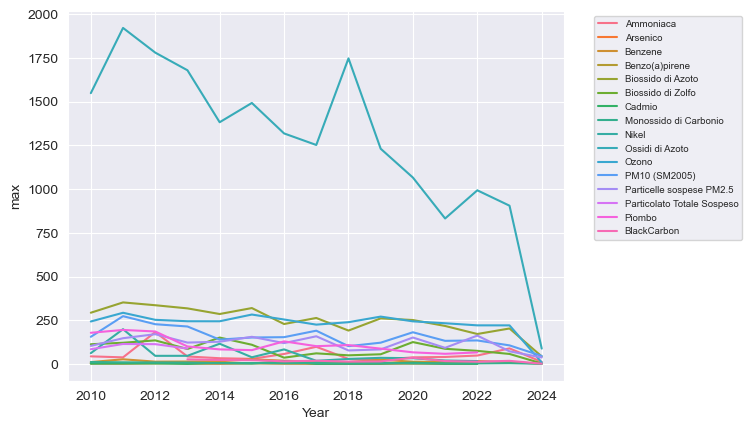

In [34]:
## Plot the max column of the df_yearly_summary dataframe
sns.lineplot(x='Year', y='max', hue='NomeTipoSensore', data=df_yearly_summary)
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
## Create a dataframe with each unique value of 'NomeTipoSensore' as index and the average value of 'Valore' for all the rows that correspond to the same day as columns
df_daily_average = df_air_quality.pivot_table(index='NomeTipoSensore', columns=['Year', 'Month', 'Day'], values='Valore', aggfunc='mean')
df_daily_average.head()

Year                    2010                                              \
Month                     1                                                
Day                       1          2          3          4          5    
NomeTipoSensore                                                            
Ammoniaca                NaN        NaN        NaN        NaN        NaN   
Arsenico            0.350000        NaN   0.771500        NaN   1.492000   
Benzene             5.152174   2.387500   1.891667   3.316667   4.183333   
Benzo(a)pirene           NaN   0.281500        NaN   0.890000        NaN   
Biossido di Azoto  52.861111  29.575116  51.500000  62.497880  59.024180   

Year                                                                      ...  \
Month                                                                     ...   
Day                       6          7          8          9          10  ...   
NomeTipoSensore                                                           ...   
Ammoniaca                NaN        NaN        NaN        NaN        NaN  ...   
Arsenico                 NaN   1.095000        NaN   0.333333        NaN  ...   
Benzene             3.554167   4.887500   2.783333   3.650000   2.508333  ...   
Benzo(a)pirene      0.478000        NaN   0.335000        NaN   0.302000  ...   
Biossido di Azoto  59.928010  74.977738  57.460476  51.737294  39.970588  ...   

Year                    2023                                              \
Month                     12                                               
Day                       23         24         25         26         27   
NomeTipoSensore                                                            
Ammoniaca          10.714583  13.147917  13.229167  13.491667  12.597917   
Arsenico                 NaN        NaN        NaN        NaN        NaN   
Benzene             0.803125   0.523958   0.794792   1.226042   1.694792   
Benzo(a)pirene           NaN        NaN        NaN        NaN        NaN   
Biossido di Azoto  42.639063  26.050398  36.513021  39.379948  39.390104   

Year                                                              2024  
Month                                                               1   
Day                       28        29         30         31        1   
NomeTipoSensore                                                         
Ammoniaca          13.000000  11.17500  11.562500  12.381250  11.65000  
Arsenico                 NaN       NaN        NaN        NaN       NaN  
Benzene             1.943750   1.43750   1.306250   1.215625   1.12500  
Benzo(a)pirene           NaN       NaN        NaN        NaN       NaN  
Biossido di Azoto  40.848177  38.53776  36.307292  32.751042  29.68125  

[5 rows x 5114 columns]

In [36]:
## Get the max value of the daily average for each unique value of 'NomeTipoSensore'
max_daily_average = df_daily_average.max(axis=1)
print(max_daily_average)



NomeTipoSensore
Ammoniaca                      88.387500
Arsenico                        8.404000
Benzene                         8.370423
Benzo(a)pirene                  5.350000
Biossido di Azoto             128.310049
Biossido di Zolfo               8.971014
BlackCarbon                    19.695238
Cadmio                         16.773000
Monossido di Carbonio           2.886213
Nikel                         199.630000
Ossidi di Azoto               551.169428
Ozono                         130.399479
PM10 (SM2005)                 169.500000
Particelle sospese PM2.5      148.000000
Particolato Totale Sospeso    115.000000
Piombo                        195.258000
dtype: float64


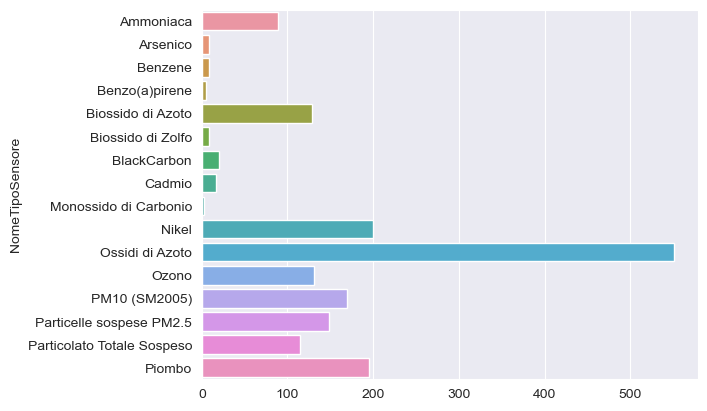

In [37]:
## Plot the max value of the daily average for each unique value of 'NomeTipoSensore'
sns.barplot(x=max_daily_average, y=max_daily_average.index)
plt.show()

In [38]:
## Get how many times the daily average is greater than 50 for Particelle sospese PM2.5 row for each year
df_air_quality[(df_air_quality['NomeTipoSensore'] == 'Particelle sospese PM2.5') & (df_air_quality['Valore'] > 50)].groupby('Year').size()

Year
2010     64
2011    109
2012    103
2013    117
2014     88
2015    160
2016    127
2017    167
2018     62
2019     69
2020    100
2021     62
2022     77
2023     38
dtype: int64